Условие
Требуется реализовать классификатор, использующий алгоритм One Rule.

Формат входных данных
Первая строка входных данных содержит два целых числа 
**N**
 и 
**K**
 — количество примеров в обучающей выборке и количество признаков соответственно.

Вторая строка содержит 
K
 слов, разделённых пробелом — названия признаков объектов.

Следующие 
N
 строк содержат обучающую выборку, каждая строка содержит по 
K
+
1
 слов, первые 
K
 слов описывают значения признаков, слово номер 
K
+
1
 содержит метку класса — 
0
 или 
1
.

Следующая строка содержит одно целое число 
M
 — количество примеров в тестовой выборке.

Далее идёт тестовая выборка, содержащая 
M
 строк по 
K
 слов. Гарантируется, что каждое значение каждого признака встречается в обучающей выборке хотя бы один раз.

Формат выходных данных
Выходные данные должны содержать 
M
 чисел — результаты классификации алгоритма One Rule после обучения на первых 
N
 примерах.

В случае если несколько признаков дают одинаковый результат на обучающей выборке, то следует выбрать тот, который встречается раньше.

Если по какому-то значению можно с одинаковой вероятностью предсказать как 0 так и 1, то следует предсказывать 1.

Ограничения
1
≤
N
,
M
,
K
≤
100

Суммарная длина строк не превосходит 
10
5

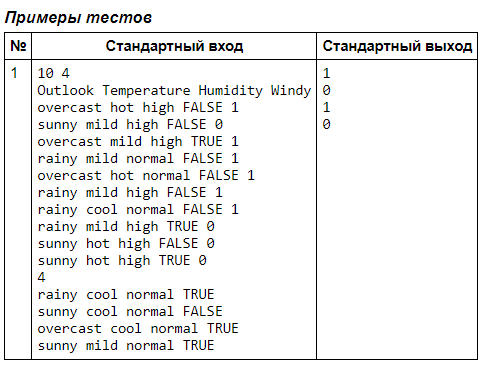

10 4

Outlook Temperature Humidity Windy

overcast hot high FALSE 1

sunny mild high FALSE 0

overcast mild high TRUE 1

rainy mild normal FALSE 1

overcast hot normal FALSE 1

rainy mild high FALSE 1

rainy cool normal FALSE 1

rainy mild high TRUE 0

sunny hot high FALSE 0

sunny hot high TRUE 0

4

rainy cool normal TRUE

sunny cool normal FALSE

overcast cool normal TRUE

sunny mild normal TRUE

In [312]:
import pandas as pd
import numpy as np

In [344]:
strNK = input()
list_to_int = lambda x: (int(i) for i in x)
N, K = to_int(str(strNK).split())
features_name = input().split()
features_name.append('class')
train_list = []
for i in range(N):
    row = input().split()
    train_list.append(row) 

M = int(input())
test_list = []
for i in range(M):
    row = input().split()
    test_list.append(row)

df_train = pd.DataFrame(train_list, columns=features_name)
df_test = pd.DataFrame(test_list, columns=features_name[:K])

10 4
Outlook Temperature Humidity Windy
overcast hot high FALSE 1
sunny mild high FALSE 0
overcast mild high TRUE 1
rainy mild normal FALSE 1
overcast hot normal FALSE 1
rainy mild high FALSE 1
rainy cool normal FALSE 1
rainy mild high TRUE 0
sunny hot high FALSE 0
sunny hot high TRUE 0
4
rainy cool normal TRUE
sunny cool normal FALSE
overcast cool normal TRUE
sunny mild normal TRUE


In [345]:
df_train

,Outlook,Temperature,Humidity,Windy,class
0,overcast,hot,high,FALSE,1
1,sunny,mild,high,FALSE,0
2,overcast,mild,high,TRUE,1
3,rainy,mild,normal,FALSE,1
4,overcast,hot,normal,FALSE,1
5,rainy,mild,high,FALSE,1
6,rainy,cool,normal,FALSE,1
7,rainy,mild,high,TRUE,0
8,sunny,hot,high,FALSE,0
9,sunny,hot,high,TRUE,0


In [346]:
df_test

,Outlook,Temperature,Humidity,Windy
0,rainy,cool,normal,TRUE
1,sunny,cool,normal,FALSE
2,overcast,cool,normal,TRUE
3,sunny,mild,normal,TRUE


In [347]:
def predict(_frame, _model):
    col_name = _model.index.name
    return _model.loc[_frame[col_name], 'ans'].values

def accuracy(_predict, _answer):
    count_true_ans = np.count_nonzero(_predict==_answer)
    accur = count_true_ans / len(_predict)
    return accur
#     count_true_ans = 0
#     for pred, ans in zip(_predict, _answer):
#         if pred == ans: count_true_ans += 1
#     accur = count_true_ans / len(_predict)
#     return accur

def fit_model(_train, _answer):
    best_model = pd.DataFrame()
    max_accur = 0
    features = _train.columns.values
    for feature in features:
        model = pd.DataFrame([_train[feature], _answer]).transpose().groupby(feature).sum()
        model['1'] = model.apply(lambda x: x['class'].count('1'), axis=1)
        model['0'] = model.apply(lambda x: x['class'].count('0'), axis=1)
        model['ans'] = model.apply(lambda x: 1 if x['1'] >= x['0'] else 0, axis=1)
        #model.drop(['class', '1', '0'], axis=1, inplace=True)
        pred = predict(_train, model)
        accur = accuracy(pred, to_int(_answer.values))
        if accur > max_accur:
            max_accur = accur
            best_model = model
    return best_model

In [348]:
best_model = pd.DataFrame()
max_accur = 0
for feature in features_name[:K]:
    model = df_train[[feature, 'class']].groupby(feature).sum()
    model['1'] = model.apply(lambda x: x['class'].count('1'), axis=1)
    model['0'] = model.apply(lambda x: x['class'].count('0'), axis=1)
    model['ans'] = model.apply(lambda x: 1 if x['1'] >= x['0'] else 0, axis=1)
    model.drop(['class', '1', '0'], axis=1, inplace=True)
    pred = predict(df_train.drop('class',axis=1), model)
    accur = accuracy(pred, to_int(df_train['class'].values))
    if accur > max_accur:
        max_accur = accur
        best_model = model
best_model

,ans
Outlook,
overcast,1
rainy,1
sunny,0


In [349]:
model = fit_model(df_train.iloc[:,:-1], df_train.iloc[:,-1])

In [350]:
pred = predict(df_test, model)

In [351]:
for i in pred: print(i)

1
0
1
0


In [333]:
import pandas as pd
import numpy as np

strNK = input()
list_to_int = lambda x: (int(i) for i in x)
N, K = to_int(str(strNK).split(' '))
features_name = input().split(' ')
features_name.append('class')
train_list = []
for i in range(N):
    row = input().split(' ')
    train_list.append(row) 

M = int(input())
test_list = []
for i in range(M):
    row = input().split(' ')
    test_list.append(row)

df_train = pd.DataFrame(train_list, columns=features_name)
df_test = pd.DataFrame(test_list, columns=features_name[:K])

def predict(_frame, _model):
    col_name = _model.index.name
    return _model.loc[_frame[col_name], 'ans'].values

def accuracy(_predict, _answer):
    count_true_ans = np.count_nonzero(_predict==_answer)
    accur = count_true_ans / len(_predict)
    return accur

def fit_model(_train, _answer):
    best_model = pd.DataFrame()
    max_accur = 0
    features = _train.columns.values
    for feature in features:
        model = pd.DataFrame([_train[feature], _answer]).transpose().groupby(feature).sum()
        model['1'] = model.apply(lambda x: x['class'].count('1'), axis=1)
        model['0'] = model.apply(lambda x: x['class'].count('0'), axis=1)
        model['ans'] = model.apply(lambda x: 1 if x['1'] >= x['0'] else 0, axis=1)
        #model.drop(['class', '1', '0'], axis=1, inplace=True)
        pred = predict(_train, model)
        accur = accuracy(pred, to_int(_answer.values))
        if accur > max_accur:
            max_accur = accur
            best_model = model
    return best_model

model = fit_model(df_train.iloc[:,:-1], df_train.iloc[:,-1])
pred = predict(df_test, model)
for i in pred: print(i)

10 4
Outlook Temperature Humidity Windy
overcast hot high FALSE 1
sunny mild high FALSE 0
overcast mild high TRUE 1
rainy mild normal FALSE 1
overcast hot normal FALSE 1
rainy mild high FALSE 1
rainy cool normal FALSE 1
rainy mild high TRUE 0
sunny hot high FALSE 0
sunny hot high TRUE 0
4
rainy cool normal TRUE 
sunny cool normal FALSE
overcast cool normal TRUE
sunny mild normal TRUE


ValueError: 4 columns passed, passed data had 5 columns

In [354]:
a = [int(item) for item in input().split()]

10 45
